In [114]:
from numpy import array,arange,loadtxt,arctan,pi,linspace,sqrt,sin,arcsin
from matplotlib.pyplot import show,figure,plot,xlim,ylim,legend,xlabel,ylabel
from scipy.optimize import curve_fit

In [115]:
def fce_linear(x,a,b):
    return a * x + b

In [116]:
def fce_quad(x,a,b,c):
    return a * x + b * x**2 + c

In [117]:
def fce_trip(x,a,b,c,d):
    return a * x + b * x**2 + c * x**3 +d

Geometric fucntion

$\theta = \dfrac{180}{\pi} \tan^{-1}\left(\dfrac{x + a}{s}\right) + \beta$



$x$ and $a$ in the units of channels. $s$ is also in the units of channels and it rescales the detector range.
$\beta[^\circ]$ is an angle.

$\dfrac{\partial\theta}{\partial s} = -\dfrac{180}{\pi} \dfrac{a+x}{a^2+2ax+s^2+x^2}= -\dfrac{180}{\pi} \dfrac{a+x}{(a+x)^2+s^2}$

$\dfrac{\partial\theta}{\partial a} = \dfrac{180}{\pi} \dfrac{s}{a^2+2ax+s^2+x^2} = \dfrac{180}{\pi} \dfrac{s}{(a+x)^2+s^2}$

$\dfrac{\partial\theta}{\partial \beta} = 1$

$\theta = \dfrac{180}{\pi}\left[ \tan^{-1}\left(\dfrac{x + a}{z\sin\left(\beta\right)}\right) + \beta\right]$

here $\beta$ is in radians

$\dfrac{\partial\theta}{\partial z} = -\dfrac{180}{\pi}\dfrac{(a + x) \csc(\beta)}{z^2 + (a + x)^2 \csc^2(\beta)}$

$\dfrac{\partial\theta}{\partial a} = \dfrac{180}{\pi}\dfrac{z \csc(\beta)}{z^2 + (a + x)^2 \csc^2(\beta))}$

$\dfrac{\partial\theta}{\partial b} = \dfrac{180}{\pi} \left[ 1 - \dfrac{z (a + x) \cot(\beta) \csc(\beta)}{z^2 + (a + x)^2 \csc^2(\beta)} \right]$

In [118]:
def fce_trig(x,a,b,s):
    return (arctan((x+a)/s)) * 180 / pi + b

In [119]:
def fce_trigz(x,a,b,z):
    t = z * sin(b)
    return (arctan((x+a)/t) + b) * 180 / pi

In [120]:
def theta0(a,s):
    return arctan(a/s)*180/pi

In [100]:
def thetam(a,s):
    return arctan((a+1279)/s)*180/pi

In [101]:
def alpha(a,s,b):
    return theta0(a,s)+b,thetam(a,s)+b

In [102]:
def dthetads(x,a,s):
    return -180 / pi * (a+x)/((a+x)**2+s**2)

In [103]:
def dthetada(x,a,s):
    return 180 / pi * (s)/((a+x)**2+s**2)

In [104]:
z = loadtxt('calibration.ini',unpack=True)
x,y = z

In [105]:
opt_lin,var=curve_fit(fce_linear,x,y)
opt_quad,var=curve_fit(fce_quad,x,y)
opt_trip,var=curve_fit(fce_trip,x,y)
opt_trig,var=curve_fit(fce_trig,x,y)
opt_trigz,var=curve_fit(fce_trigz,x,y,p0=opt_trig)

In [106]:
a,b,s = opt_trig
_a,_b,z = opt_trigz

print(a,_a)
opt_trig,theta0(a,s),thetam(a,s),alpha(a,s,b)


-1292.036650990665 -1292.0366015131672


(array([-1292.03665099,    51.72672869,  2034.21305291]),
 -32.42179668137261,
 -0.3671861479371534,
 (19.304932007640538, 51.359542541075996))

In [107]:
opt_trigz

array([-1.29203660e+03,  9.02801702e-01,  2.59113837e+03])

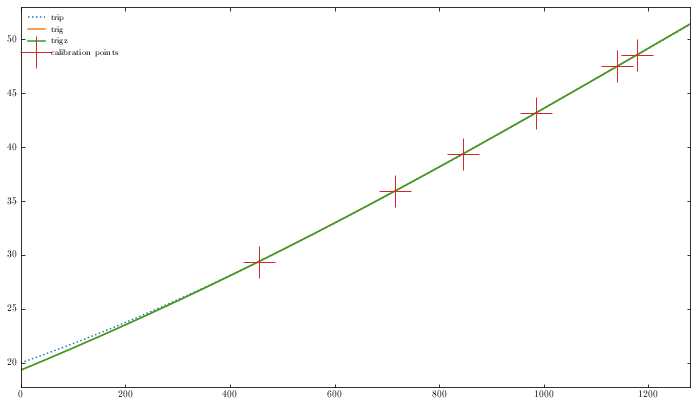

In [108]:
_x = arange(0,1280)

figure(figsize=(12,7))

plot(_x,fce_trip(_x,*opt_trip),':',label='trip')
plot(_x,fce_trig(_x,*opt_trig),'-',label='trig')
plot(_x,fce_trigz(_x,*opt_trigz),'-',label='trigz')

plot(x,y,'+',ms=32,label='calibration points')

xlim(0,1280)
legend(frameon=False)

Text(0, 0.5, 'angle $\\theta$')

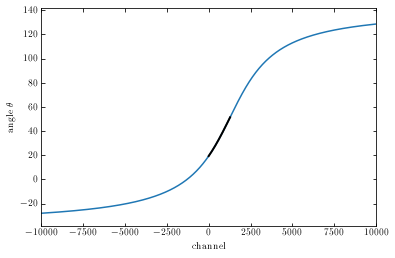

In [109]:
x = linspace(-10000,10000,1000)
y = fce_trig(x,*opt_trig)
plot(x,y)

x = linspace(_x[0],_x[-1],1000)
y = fce_trig(x,*opt_trig)
plot(x,y,'k-',lw=2)

a,b,s = opt_trig

ylim(-90+b,90+b)
xlim(-10000,10000)
xlabel('channel')
ylabel(r'angle $\theta$')

22.761266406756214 51.40673334257907


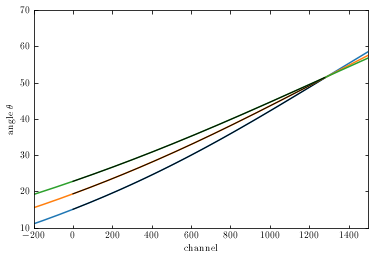

In [110]:
a,b,s = opt_trig

for d in [-300,0,300]:
    x = linspace(-10000,10000,1000)
    y = fce_trig(x,a,b,s+d)
    plot(x,y)

    x = linspace(_x[0],_x[-1],1000)
    y = fce_trig(x,a,b,s+d)
    plot(x,y,'k-',lw=1)

a,b,s = opt_trig

ylim(10,70)
xlim(-200,1500)
xlabel('channel')
ylabel(r'angle $\theta$')
print(y[0],y[-1])

19.6026958157748 51.36374496017274


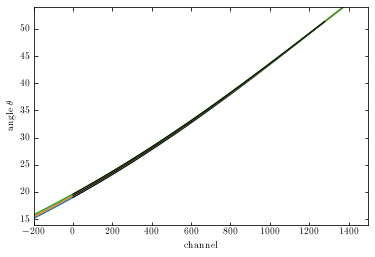

In [111]:
a,b,z = opt_trigz

for d in [-30,0,30]:
    x = linspace(-10000,10000,1000)
    y = fce_trigz(x,a,b,z+d)
    plot(x,y)

    x = linspace(_x[0],_x[-1],1000)
    y = fce_trigz(x,a,b,z+d)
    plot(x,y,'k-',lw=1)

ylim(14,54)
xlim(-200,1500)
xlabel('channel')
ylabel(r'angle $\theta$')
print(y[0],y[-1])

(-1000.0, 2000.0)

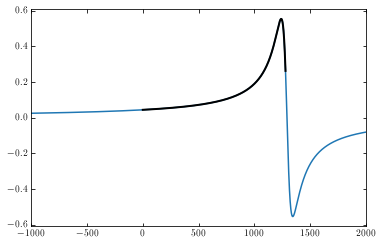

In [112]:
x = linspace(-10000,10000,20000)
y = dthetads(x,*opt_trig[:2])
plot(x,y)

x = linspace(_x[0],_x[-1],20000)
y = dthetads(x,*opt_trig[:2])
plot(x,y,'k-',lw=2)
xlim(-1000,2000)

(-1000.0, 2000.0)

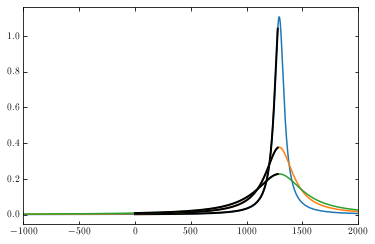

In [113]:
a,s = opt_trig[:2]

for d in [0,100,200]:
    x = linspace(-10000,10000,20000)
    y = dthetada(x,a,s+d)
    plot(x,y)

    x = linspace(_x[0],_x[-1],20000)
    y = dthetada(x,a,s+d)
    plot(x,y,'k-',lw=2)
xlim(-1000,2000)